In [60]:
import pandas as pd

Auswahl Parkhaus

In [61]:
phliste = "K01: Kongresszentrum PH1, Durchfahrtshöhe 190cm, 5 Behindertenstellplätze\n\
      K02: Kongresszentrum PH2, Durchfahrtshöhe 190cm, 12 Behindertenstellplätze\n\
        K03: Luisenstraße, Durchfahrtshöhe 200cm, 0 Behindertenstellplätze\n" + "..."
print(phliste)
phk = input("Bitte geben Sie das Parkhaus-Kürzel an: ")

K01: Kongresszentrum PH1, Durchfahrtshöhe 190cm, 5 Behindertenstellplätze
      K02: Kongresszentrum PH2, Durchfahrtshöhe 190cm, 12 Behindertenstellplätze
        K03: Luisenstraße, Durchfahrtshöhe 200cm, 0 Behindertenstellplätze
...


Einlesen der Parkhaus-CSV

In [62]:
data = pd.read_csv(phk + ".csv")
print(data)

     Unnamed: 0            timestamp  free_spots
0             0  2023-10-31 22:40:00         814
1             1  2023-10-31 22:45:00         814
2             2  2023-10-31 22:50:00         814
3             3  2023-10-31 22:55:00         814
4             4  2023-10-31 23:00:00         814
..          ...                  ...         ...
558         558  2023-11-02 21:10:00         700
559         559  2023-11-02 21:15:00         700
560         560  2023-11-02 21:20:00         700
561         561  2023-11-02 21:25:00         700
562         562  2023-11-02 21:30:00         700

[563 rows x 3 columns]


Aggregation auf Stunden (anhand Mittelwert der free spots)

In [63]:
# Konvertierung ins datetime-Format
data['timestamp'] = pd.to_datetime(data['timestamp'])
# Abrunden auf die Stunde
data['timestamp_hour'] = data['timestamp'].dt.floor('H')

# Gruppieren nach Datum und abgerundeter Stunde, dann Mittelwert berechnen
hourly_avg_per_day = data.groupby(data['timestamp_hour'])['free_spots'].mean()
hourly_avg_per_day = hourly_avg_per_day.reset_index(name='average_free_spots')
hourly_avg_per_day = round(hourly_avg_per_day, 0)

# Ausgabe des DataFrames
hourly_avg_per_day


,timestamp_hour,average_free_spots
0,2023-10-31 22:00:00,814.0
1,2023-10-31 23:00:00,814.0
2,2023-11-01 00:00:00,815.0
3,2023-11-01 01:00:00,815.0
4,2023-11-01 02:00:00,815.0
5,2023-11-01 03:00:00,815.0
6,2023-11-01 04:00:00,815.0
7,2023-11-01 05:00:00,815.0
8,2023-11-01 06:00:00,815.0
9,2023-11-01 07:00:00,815.0


Visualisierung Liniendiagramm

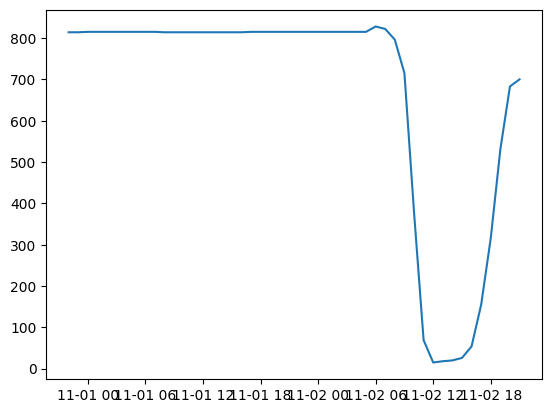

In [64]:
import matplotlib.pyplot as plt

# Stellen Sie sicher, dass die Daten nach 'timestamp_hour' sortiert sind, um ein korrektes Liniendiagramm zu erhalten
hourly_avg_per_day.sort_values('timestamp_hour', inplace=True)

# Erstellen eines Liniendiagramms mit der 'timestamp_hour'-Spalte als X-Achse und 'average_free_spots' als Y-Achse
plt.plot(hourly_avg_per_day['timestamp_hour'], hourly_avg_per_day['average_free_spots'])

# Zeige das Diagramm an
plt.show()